# Python Homework 4: Arcsine Laws

The purpose of this python homework is to explore the so-called <i>Arcsine laws</i> numerically. The arcsine laws are a number of fascinating results for random walks. They relate path properties of the simple symmetric random walk to the <i>arcsine distribution</i>. 

A random variable $X$ on $[0,1]$ is arcsine-distributed if the cumulative distribution function is given by
$$ \mathbb{P}[X \leq x] = \frac{2}{\pi} \arcsin(\sqrt{x}) $$
for all $0 \leq x \leq 1$ and the probability density function is given by 
$$ f_X(x) = \frac{1}{\pi \sqrt{x(1-x)}}$$
on $(0,1)$. 

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, we define the following random variables:
* The total number of periods from $0$ to $2N$ the random walk spends above zero: 

$$C_{2N}:= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time of the last visit to $0$ before time $2N$: 

$$L_{2N}:= \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk reaches its unique maximum value between time $0$ and $2N$: 

$$M_{2N}:= \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$ This notation means that $S_{M_{2N}} = \max \{ S_n : 0 \leq n \leq 2N \}$. Note that the maximum value is uniquely defined but there might be several times when it is reached. In this case $M_{2N}$ can be defined to be the last time it is reached. You will see that for large $N$ it does not really matter.

Start with loading some packages:

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.stats import arcsine

# Allows to render plots directly within the notebook
%matplotlib inline

## Problem 1 (1 points)

Write a Python code to simulate one <i>path</i> of a simple symmetric random walk with $2N$ time steps (i.e. <tt>lengthOfRandomWalk = 2N</tt>) starting at $S_0=0$. 

The function <tt>randomWalk</tt> should return an array of length 2N with the entire path of the random walk.

In [3]:
### Insert your code here for simulating the random walk
def randomWalk(two_N):
    samplePath = []
    step = 0
    for i in range(two_N):
        p = np.random.random(1)
        if p <= 0.5:
            step += -1
            samplePath.append(step)
        else:
            step += 1
            samplePath.append(step)
    samplePath = np.array(samplePath)   
    return samplePath


## Problem 2 (6 points)

Write three Python functions which take a path of a random walk as an input and then compute the values of the random variables $C_{2N}, L_{2N}, M_{2N}$, respectively, as defined above:

In [4]:
### Insert your code here for total time spend above zero
def timeAboveZero(path):
    result = np.sum(path[path > 0])
    return result

In [5]:
### Insert your code here for last time the random walk visited zero
def timeOfLastVisitOfZero(path):
    indices = np.where(path == 0)
    return indices[-1]

In [6]:
### Insert your code here for the time when the random walk hits its maximum
def lastTimeHitMax(randomWalk):
    maximum = max(randomWalk)
    indices = np.where(path == maximum)
    return indices[-1]

## Problem 3 (3 points)

Random Walk theory provides us with the following nice (and maybe counterintuitive) asymptotic statements:

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{L_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, L_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

The interesting property about the Arcsine distribution is that its density (see its formula above) is <i>U-shaped</i> on $(0,1)$. In other words, if $X$ is arcsine-distributed on $(0,1)$, the probabilty that $X$ takes very small values near 0 or very large values near 1 is rather high, but the probability for taking values around, say, 0.5, is low. 

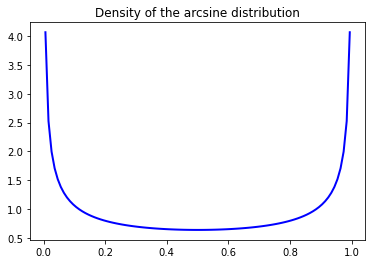

In [7]:
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')

For $2N = 1000$ sample 10,000 realisations of each of the random variables $C_{2N}/2N, L_{2N}/2N,$ and $M_{2N}/2N$, respectively. Display a normalized histogram for all three simulations, along with the probability density function of the arcsine distribution, to check the above facts numerically! 

In [8]:
### Implement your Simulations here

sampleSize = 10000

c, l, m = [], [], []

for i in range(sampleSize):
    path = randomWalk(1000)
    c.append(timeAboveZero(path)/1000)
    l.append(timeOfLastVisitOfZero(path)/1000)
    m.append(lastTimeHitMax(path)/1000)

In [ ]:
### Complete the plot commands accordingly

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $C_{1000}$")
plt.hist(c, bins='auto',density='true')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{1000}$")
plt.hist(l, bins='auto',density='true')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()


plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{1000}$")
plt.hist(m, bins='auto',density='true')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

/Users/shobhanashreedhar/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
